In [1]:
using Plots
cd(s"C:\Users\User\Desktop\Mycop\plots")

https://ru.wikipedia.org/wiki/Водородоподобный_атом

https://ru.wikipedia.org/wiki/Атом_водорода

In [2]:
const nm = 1e-9 # m
const fm = 1e-15 # m
const ps = 1e-12 # s
const fs = 1e-15 # s

const c = 299792458 # m/s
const ħ = 1.0546e-34 # J*s
const e = 1.6022e-19 # Kl
const mₑ = 9.1094e-31 # kg
const mp = 1.6726e-27
const ε₀ = 8.8542e-12 # F/m

const k = 1/(4π*ε₀) # 8.987552e9 # N*m^2/q^2
const rₑ = k*e^2 / (mₑ*c^2) # 2.81794e-15 # m
const a₀ = 0.052917720859nm # 4π*ε₀*ħ^2 / (mₑ*q^2)
const α = 1/137.036 # e^2/(ħ*c)
const vₑ = α*c # 2187 km/c

2.187691249014857e6

\begin{cases}r={\sqrt {x^{2}+y^{2}+z^{2}}},\\\theta =\arccos {\dfrac {z}{\sqrt {x^{2}+y^{2}+z^{2}}}}=\mathrm {arctg} {\dfrac {\sqrt {x^{2}+y^{2}}}{z}},\\\varphi =\mathrm {arctg} {\dfrac {y}{x}}.\end{cases}


$$ \psi _{nlm}(r,\theta ,\varphi )={\sqrt {\frac {(n-l-1)!}{2n{\cdot }(n+l)!}}}{\cdot }{\left({\frac {2}{na_{0}}}\right)}^{\frac {3}{2}}{\cdot }\exp {\left({-{\frac {r}{na_{0}}}}\right)}{\cdot }{\left({\frac {2r}{na_{0}}}\right)}^{l}L_{n-l-1}^{2l+1}{\left({\frac {2r}{na_{0}}}\right)}\cdot Y_{l,m}(\theta ,\varphi )$$

$$ L_{n}^{(\alpha )}(x)=\sum _{i=0}^{n}(-1)^{i}{n+\alpha \choose n-i}{\frac {x^{i}}{i!}}$$

$$ Y_{\ell }^{m}(\theta ,\varphi )=(-1)^{m}{\sqrt {{(2\ell +1) \over 4\pi }{(\ell -m)! \over (\ell +m)!}}}\,P_{\ell m}(\cos {\theta })\,e^{im\varphi }$$

$$P_{l}^{m}(x)=2^{l}\cdot (1-x^{2})^{m/2}\cdot \sum _{k=m}^{l}{\frac {k!}{(k-m)!}}\cdot x^{k-m}\cdot {\binom {l}{k}}{\binom {\frac {l+k-1}{2}}{l}}$$


$$ {\binom {\alpha }{k}}={\frac {\alpha ^{\underline {k}}}{k!}}={\frac {\alpha (\alpha -1)(\alpha -2)\cdots (\alpha -k+1)}{k(k-1)(k-2)\cdots 1}}\quad {\text{for }}k\in \mathbb {N} {\text{ and arbitrary }}\alpha $$

In [ ]:
bino(a, k) = k>0 ? prod(i-> a-i, 0:k-1) / factorial(k) : k<0 ? 0.0 : 1.0

P(x::Float64, m::Int64, l::Int64) = (-1)^m * 2^l * sqrt(1-x^2)^m * 
        sum( k-> factorial(k)/factorial(k-m) * x^(k-m) * binomial(l, k)*bino( 0.5(l+k-1), l ), m:l )

Y(θ::Float64, ϕ::Float64, m::Int64, l::Int64) = 
        sqrt( (2l+1)/(4π) * factorial(l-m)/factorial(l+m) ) * P( cos(θ), m, l ) * exp(im*m*ϕ)

L(x::Float64, a::Int64, n::Int64) = sum( i-> (-1)^i * binomial(n+a, n-i)*x^i / factorial(i), 0:n );

In [ ]:
function ψ(n, l, m, gr) # квантовые числа и радиус в борах
    
    a₀ = 1.0 # Bohr radius
    A = (2/(n*a₀))^2 * sqrt( 0.25a₀*factorial(n-l-1) / factorial(n+l)^3 )
    
    F(x) = x^l * exp(-0.5x) * factorial(n+l) * L( x, 2l+1, n-l-1 )
    R(r, θ, ϕ) = F( 2r/(n*a₀) ) * abs( Y(θ, ϕ, m, l) )
    R(x, z) = begin r = hypot(x,1,z); R( r, acos(z/r), atan(x,0) ) end
    
    X = range(-gr, stop = gr, length = 200)
    
    Sol = [ abs2( A*R(x, z) ) for x in X, z in X ]
    
    Sol /= (sum(Sol)*step(X)) # нормировка
    #println(sum(Sol)*step(X))
    
    return X, Sol
end;

In [ ]:
X, Z = ψ(4, 3, 0, 40);
heatmap(X, X, Z, xaxis="a₀", yaxis="a₀")

In [ ]:
Ps = Plots.Plot{Plots.GRBackend}[] # пустой массив специально под картинки

for n in 1:4, l in 0:n-1, m in 0:l # перебираем квантовые числа
    X, Z = ψ(n, l, m, 5n)
    p0 = heatmap(X, X, Z, title = "$n $l $m",
        legend = false, ticks = nothing, border = :none)
    push!(Ps, p0)
end;

In [ ]:
plot(Ps..., size = (600, 400))

In [ ]:
savefig("Sorb.png")

In [ ]:
X = collect(-3:0.01:3)
ψ100(r) = 4π*r*exp(-r)/sqrt(π)
ρᵣ = [ ψ100(x^2+y^2) for x in X, y in X ] 
ρᵣ /= maximum(ρᵣ)

heatmap(X, X, ρᵣ, xaxis="a₀", yaxis="a₀")

Θs = collect((0:0.01:1)*2π)
rp = 0.841fm/a₀ 
plot!( cos.(Θs), sin.(Θs), line = (2, :dash, :green), lab = "Bor's orbit" ) 
plot!( rp*cos.(Θs), rp*sin.(Θs), line = (2, :dash, :red), lab = "Proton radius" ) 
# , ticks = nothing, border = :none,

In [ ]:
n = 1
xx = 0
ξ = 1e-5
while xx < 3
    n+=1
    xx += (ξ*n)^2
end
n

In [ ]:
steps = [ (ξ*i)^2 for i in 1:n ]
Xadapt = [0.0; accumulate(+, steps ) ]

In [ ]:
ψ100(4e-5^2)

In [ ]:
plot(Xadapt, [ ψ100(x^2) for x in Xadapt ], line = 3, lab = "Radial distr")
vline!([rp 1], lab = ["Proton radius" "Bor's orbit"], line = (2, :dash) )
#lens!([0, 4e-5], [0, 6e-7], inset = (1, bbox(0.6, 0.3, 0.3, 0.3)), 
#        xticks = 0:1e-5:2e-5, yticks = 0:1e-7:4e-7,  subplot = 2 ) 

In [ ]:
xx = collect(0:1e-6:4e-5)
plot(xx, [ ψ100(x^2) for x in xx ], line = 3, 
    legend = false, xticks = 0:2e-5:4e-5, xaxis = (0,4e-5) )
vline!([rp], lab = "Proton radius", line = (2, :dash), size = (220, 150))

### Бомовские орбиты

$$
\phi(t) = \phi_0 + \frac{\hbar t \sin^2\theta}{m_e ra_0}
$$

In [3]:
function ϕ(r, θ)
    dats = zeros(100,3)
    T = 2π*mₑ*r*a₀ / (ħ*sin(θ)^2)
    
    function ϕ(t)
        fi = ħ*t/(mₑ*r*a₀) * sin(θ)^2
        x = r*sin(θ)*cos(fi)
        y = r*sin(θ)*sin(fi)
        z = r*cos(θ)
        [x y z] / a₀
    end
    dats = [ ϕ(t) for t in range(0, length = 100, stop = T) ]
    vcat( dats... )
end

ϕ (generic function with 1 method)

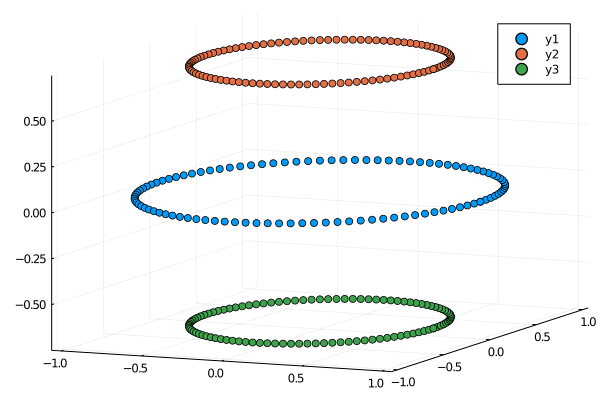

In [4]:
dat = ϕ(a₀, 0.5π)
scatter(dat[:,1], dat[:,2], dat[:,3])
dat = ϕ(a₀, 0.25π)
scatter!(dat[:,1], dat[:,2], dat[:,3])
dat = ϕ(a₀, 0.75π)
scatter!(dat[:,1], dat[:,2], dat[:,3])

In [ ]:
dat = ϕ(a₀, 0.5π)
for i in 10:10:100
    plot( dat[i-9:i,1], dat[i-9:i,2], dat[i-9:i,3], xaxis = ((-1,1), -1:0.5:1), 
        yaxis = ((-1,1), -1:0.5:1), zaxis = ((-1,1), -1:0.5:1), legend = false, line = 2 )
    scatter!( [0.0], [0.0], [0.0], m = (30, :red), title = "θ = π/2" )
    scatter!( [dat[i,1]], [dat[i,2]], [dat[i,3]], m = (10, :blue) )
    plot!( [dat[:,1]], [dat[:,2]], [dat[:,3]], line = (:dash, :green) )
    savefig("imga$i.png")
end

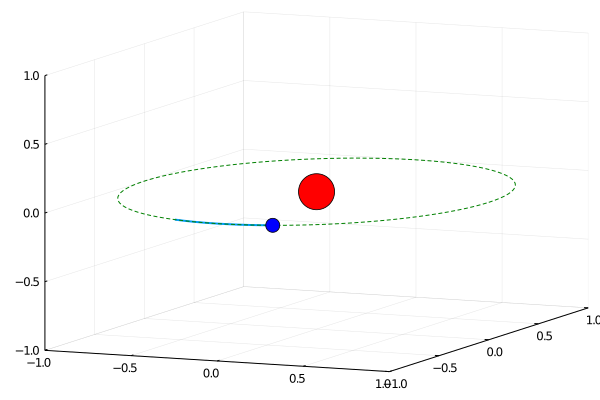

In [6]:
dat = ϕ(a₀, 0.5π)
i = 80
plot( dat[i-9:i,1], dat[i-9:i,2], dat[i-9:i,3], xaxis = ((-1,1), -1:0.5:1), 
        yaxis = ((-1,1), -1:0.5:1), zaxis = ((-1,1), -1:0.5:1), legend = false, line = 2 )
plot!( [dat[:,1]], [dat[:,2]], [dat[:,3]], line = (:dash, :green) )
scatter!( [0.0], [0.0], [0.0], m = (20, :red) )
scatter!( [dat[i,1]], [dat[i,2]], [dat[i,3]], m = (8, :blue) )

In [126]:
savefig("img2px.png")

In [7]:
function rk4(f, x, y, h)
    k1 = h * f(x       , y        )
    k2 = h * f(x + 0.5h, y + 0.5k1)
    k3 = h * f(x + 0.5h, y + 0.5k2)
    k4 = h * f(x +    h, y +    k3)

    return y + (k1 + 2*(k2 + k3) + k4)/6.0
end

rk4 (generic function with 1 method)

$$
\dot{r} = -\frac{\hbar}{m_e r}\tan\phi \\
\dot{\theta} = -\frac{\hbar}{m_e r^2}\cot\theta\tan\phi \\
\dot{\phi} = -\frac{\hbar}{m_e r^2}\left( 1-\frac{r}{2a_0}+\cot^2\theta \right)
$$

In [93]:
function solver(r_θ::Array{Float64,2})
    
    cron = range(0, length = 1000, stop = 24)
    st = step(cron)
    
    syst(t, r) = -8/(3r[1]) * 
        [ tan(r[3]) cot(r[2])*tan(r[3])/r[1] (1-0.5r[1]+cot(r[2])^2)/r[1] ]

    sols = [ r_θ = rk4(syst, t, r_θ, st) for t in cron ]
    
    pol2dec(r) = r[1]*[ sin(r[2])*cos(r[3]) sin(r[2])*sin(r[3]) cos(r[2]) ]
    
    vcat( [ pol2dec(s) for s in sols ]... ) 
end;

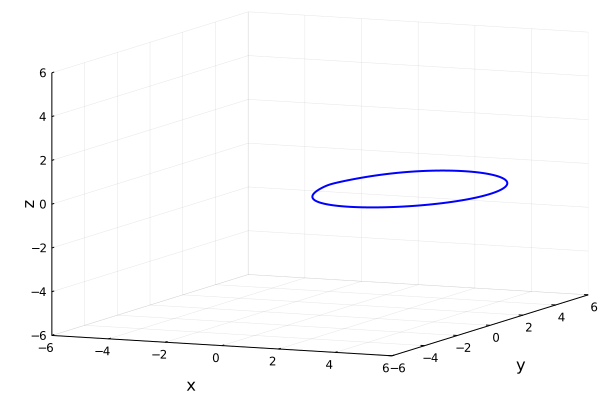

In [115]:
dat = solver([6 0.5π 0.0])
plot( dat[:,1], dat[:,2], dat[:,3], 
        xaxis = ((-6,6), -6:2:6, "x"), 
        yaxis = ((-6,6), -6:2:6, "y"), 
        zaxis = ((-6,6), -6:2:6, "z") )

In [ ]:
scatter( dat[:,1], dat[:,2] )

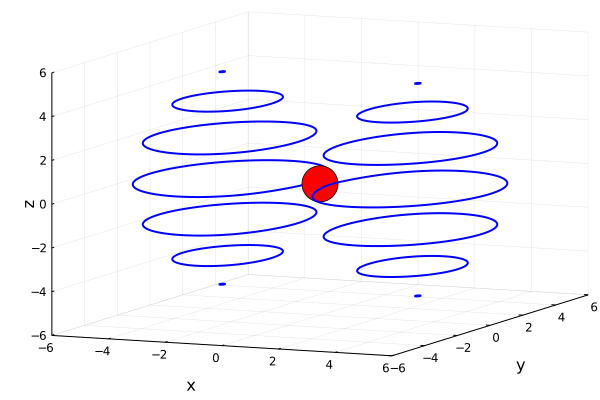

In [127]:
plot()
for fi in π*(0.2:0.1:0.8)
    dat = solver([6 fi π])
    plot!( dat[:,1], dat[:,2], dat[:,3], line = (2, :blue) )
end

scatter!( [0.0], [0.0], [0.0], m = (20, :red) )

for fi in π*(0.2:0.1:0.8)
    dat = solver([6 fi 0.0]) # π
    plot!( dat[:,1], dat[:,2], dat[:,3], line = (2, :blue) )
end

plot!(xaxis = ((-6,6), -6:2:6, "x"), 
      yaxis = ((-6,6), -6:2:6, "y"), 
      zaxis = ((-6,6), -6:2:6, "z"), legend = false)

┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1278


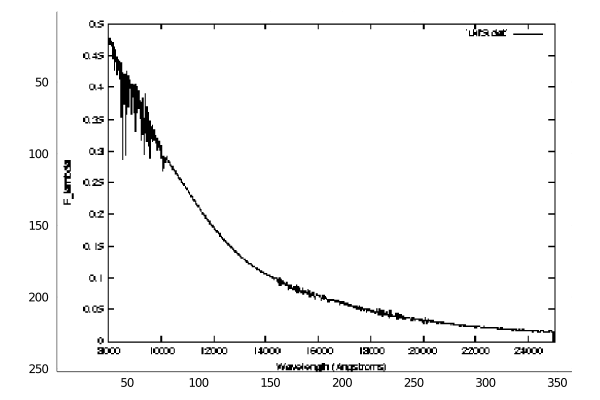

In [5]:
import FileIO
img = FileIO.load("ukf5i.gif")
plot(img)

In [6]:
using DelimitedFiles

In [43]:
dats = readdlm("newf.txt");
size(dats)

(4771, 6)

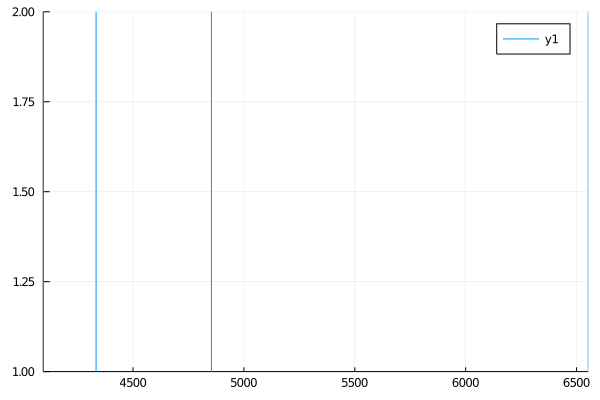

In [134]:
E0 = 2.1827e-18 # J
j = 0
h = 6.626e-34
En(n) = E0/n^2 * (1 + α^2/n^2 * ( n/(j+0.5)-0.75 ) )
Ens = [ 1e10/(En(n)*n^2/h/c*(0.25-1/n^2) ) for n in 3:6] #  # 100000/(109.737*(0.25-1/n^2))
vline(Ens)

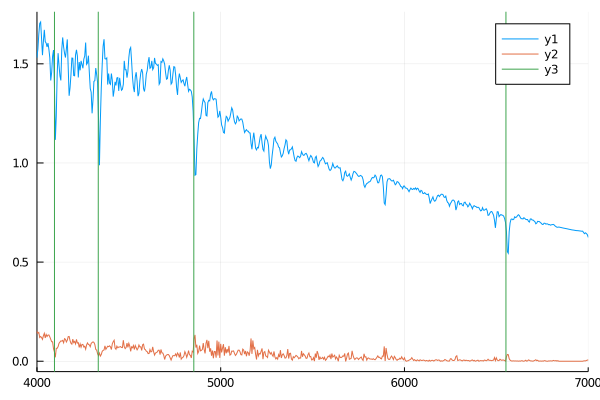

In [140]:
plot(dats[:, 1], dats[:, 2])
plot!(dats[:, 1], dats[:, 3])
vline!(Ens)
xaxis!((4000,7000))